In [1]:
from pylab import *

In [9]:
def RK4(f, t_intervalo, y0, delta=0.01):
  t=arange(t_intervalo[0],t_intervalo[1]+delta,delta)
  sol=zeros((len(y0),len(t))) #Sol=zeros.like(t)
  sol[:,0]=y0 #sol[0] para usar escalares en lugar de vectores
  for i in range(len(t)-1):
    k1= f(t[i],sol[:,i])
    k2=f(t[i]+ 0.5*delta, sol[:,i] + 0.5* delta*k1)
    k3=f(t[i]+ 0.5*delta, sol[:,i] + 0.5* delta*k2)
    k4=f(t[i]+ delta, sol[:,i] +  delta*k3)
    sol[:,i+1]=sol[:,i] + (delta/6)*(k1+2*k2 + 2*k3 + k4)
  return (t,sol)

In [13]:
def mov_planet1(t,x):
    # x es x, y, vx,vy
    dx=x[2]
    dy=x[3]
    d32xy=(x[0]**2+x[1]**2)**1.5
    dvx=-x[0]/d32xy
    dvy=-x[1]/d32xy
    return array([dx,dy,dvx,dvy])

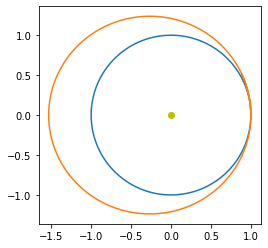

In [15]:
cond_ini=[1,0,0,1]
solucion=RK4(mov_planet1,(0,2*pi),cond_ini)
plot(solucion[1][0],solucion[1][1])
gca().set_aspect('equal')

cond_ini=[1,0,0,1.1]
solucion=RK4(mov_planet1,(0,3*pi),cond_ini)
plot(solucion[1][0],solucion[1][1])
plot([0],[0],'yo')
gca().set_aspect('equal')
show()

In [18]:
#calcular el producto cruz de dos vectores
a=array([1,2,1])
b=array([2,2,0])
c=cross(a,b)
c

array([-2,  2, -2])

In [22]:
a,b=solucion[1].shape
print(a/2)
print(b)

2.0
944


In [39]:
def vec_L2D(datos,n_part=1):
    variables, integraciones = datos.shape
    momento_angular=zeros(integraciones)
    for i in range(integraciones):
        momento_angular[i]=cross(datos[:2,i],datos[2:,i])
    return  momento_angular

Momento angular inicial= 1.1
Momento angular final= 1.0999999999953844


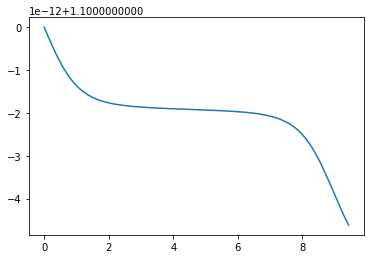

In [41]:
L=vec_L2D(solucion[1])
plot(solucion[0],L)
print('Momento angular inicial=',L[0])
print('Momento angular final=',L[-1])
#ylim([1,1.2])
show()

In [45]:
def Ener_k(datos):
    variables, integraciones = datos.shape
    E_k=zeros(integraciones)
    for i in range(integraciones):
        E_k[i]=0.5*(datos[2,i]**2+datos[3,i]**2)
    return  E_k

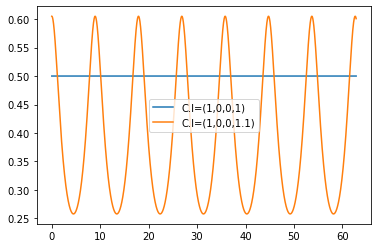

In [48]:
cond_ini=[1,0,0,1]
solucion=RK4(mov_planet1,(0,2*pi*10),cond_ini)
k=Ener_k(solucion[1])
plot(solucion[0],k,label='C.I=(1,0,0,1)')

cond_ini=[1,0,0,1.1]
solucion=RK4(mov_planet1,(0,2*pi*10),cond_ini)
k=Ener_k(solucion[1])
plot(solucion[0],k,label='C.I=(1,0,0,1.1)')

legend()
show()